In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

traindf = pd.read_csv("data/train.csv")
testdf = pd.read_csv("data/test.csv")

traindf.shape

(1620, 11)

# Part 1: Data Preprocessing


```[Q1] Report the number of remaining records after duplicate removal and paste the screenshot of the heatmap.```
```
Number of records in train.csv: (1617, 11)
Number of records in test.csv: (400, 11)
```

In [2]:
#data preprocessing

#remove duplicates
traindf.drop_duplicates(inplace = True)
testdf.drop_duplicates(inplace = True)

# print(testdf.isna().sum())
for col in testdf:
    traindf[col].fillna(traindf[col].median(), inplace = True)
    testdf[col].fillna(testdf[col].median(), inplace = True)

print("Number of records in train.csv:", traindf.shape)
print("Number of records in test.csv:", testdf.shape)

Number of records in train.csv: (1617, 11)
Number of records in test.csv: (400, 11)


#### HEATMAP

<AxesSubplot:>

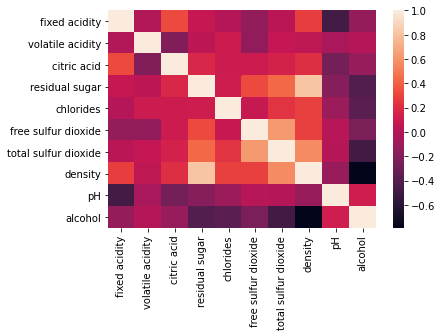

In [3]:
# visualize the correlation every 2 of the 10 features with a heatmap.
traindf_corr = traindf.iloc[:,:-1].corr()
sns.heatmap(traindf_corr)

# Part 2: Regression
 

In [4]:
# linear reg, splitting data, R^2 and mean_squared_error libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
features = [
    "fixed acidity",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide", 
    "total sulfur dioxide",
    "alcohol"
    ]
Y = traindf["density"]

In [6]:
R2_values =  {}
def linearReg (X_train, Y_train, X_val, Y_val, feature):
    model = LinearRegression()
    model.fit(X_train.values.reshape(-1,1), Y_train)

    plt.scatter(X_val, Y_val)
    yfit = model.predict(X_val.values.reshape(-1,1))
    plt.plot(X_val, yfit, color = "r")
    plt.ylabel("Density")
    plt.xlabel(feature)
    plt.title("Density vs " + feature + '\nR^2 score: %.2f' % r2_score(Y_val, yfit))
    x = np.arange(0.98, 1.01, 0.01)
    plt.yticks([0.98, 0.99, 1.00, 1.01])
    plt.show()
    R2_values["Density vs " + feature] = r2_score(Y_val, yfit)
    print("y = ax + b")
    print("y = ", model.coef_, "* x + ", model.intercept_)

```[Q2] Report the validation R2 score of each model to evaluate the relationship between different features and ‘density’.```
```
1 . Density vs fixed acidity 0.06121630722910132
2 . Density vs residual sugar 0.6657111313550805
3 . Density vs chlorides 0.08292629933478712
4 . Density vs free sulfur dioxide 0.09776154943324744
5 . Density vs total sulfur dioxide 0.3058437254204954
6 . Density vs alcohol 0.6242802278261513
7 . Density vs all 6 models 0.9333038833878456
```

```[Q3] After training the models with the training set, use them to make prediction on the validation set. Then, plot the regression line and the data points of the validation set for each of the first six models.```


[Q3] After training the models with the training set, use them to make prediction on the validation set. Then, plot the regression line and the data points of the validation set for each of the first six models.


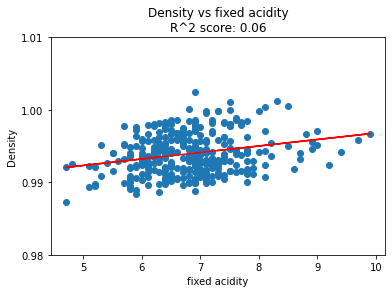

y = ax + b
y =  [0.00089539] * x +  0.9878513992648529


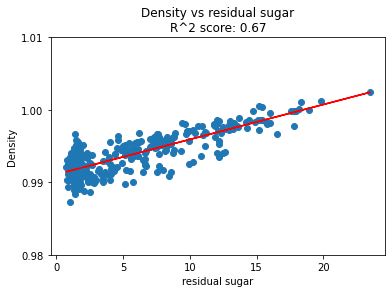

y = ax + b
y =  [0.00048185] * x +  0.9911011079618991


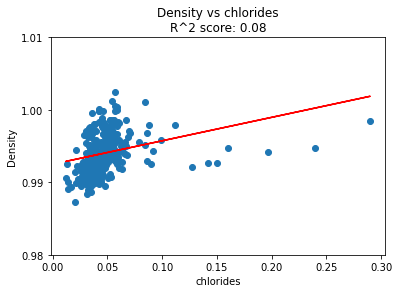

y = ax + b
y =  [0.03232686] * x +  0.9924982923778399


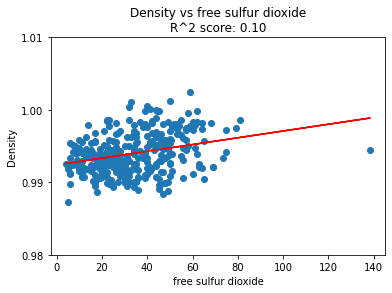

y = ax + b
y =  [4.66458508e-05] * x +  0.9924143005036553


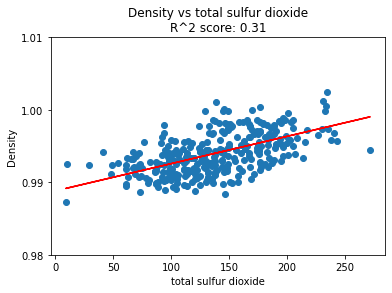

y = ax + b
y =  [3.75791777e-05] * x +  0.9888192706105808


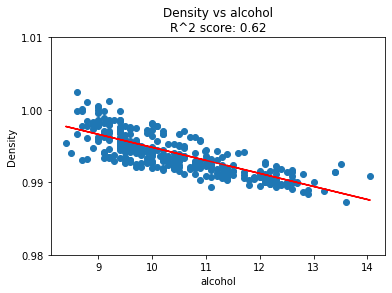

y = ax + b
y =  [-0.00179973] * x +  1.0128284132620933



In [7]:
print("[Q3] After training the models with the training set, use them to make prediction on the validation set. Then, plot the regression line and the data points of the validation set for each of the first six models.")
for feature in features:
    X_train, X_validation, Y_train, Y_validation = train_test_split(traindf[feature], Y, train_size=0.8, random_state = 4211)
    linearReg(X_train, Y_train, X_validation, Y_validation, feature)
    
# Regression with all 6 features vs density
X_train, X_validation, Y_train, Y_validation = train_test_split(traindf[features], Y, train_size=0.8, random_state = 4211)
modelX = X_train[["fixed acidity","residual sugar","chlorides", "free sulfur dioxide", "total sulfur dioxide","alcohol"]].values
modelY = Y_train.values.reshape(-1,1)
model = LinearRegression().fit(modelX, modelY)

validationX = X_validation[["fixed acidity","residual sugar","chlorides", "free sulfur dioxide", "total sulfur dioxide","alcohol"]].values
validationY = Y_validation.values.reshape(-1,1)
print()
val_predict = model.predict(validationX)
R2_values["Density vs all 6 models"] = r2_score(val_predict, validationY)

In [8]:
i = 1
for key in R2_values:
    print(i, '.', key, R2_values[key])
    i += 1

1 . Density vs fixed acidity 0.06121630722910132
2 . Density vs residual sugar 0.6657111313550805
3 . Density vs chlorides 0.08292629933478712
4 . Density vs free sulfur dioxide 0.09776154943324744
5 . Density vs total sulfur dioxide 0.3058437254204954
6 . Density vs alcohol 0.6242802278261513
7 . Density vs all 6 models 0.9333038833878456


# Part 3: Classification

In [9]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix

#chi_squared_library
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#for preprocession
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
all_features = ["fixed acidity",
                "volatile acidity",
                "citric acid",
                "residual sugar",
                "chlorides",
                "free sulfur dioxide",
                "total sulfur dioxide",
                "density",
                "pH",
                "alcohol"
               ]
Y = traindf["label"]


In [12]:
#splitting the traindf dataset into train and validation sets
X_train, X_validation, Y_train, Y_validation = train_test_split(traindf[all_features], Y, train_size=0.8, random_state = 4211)
X_test, Y_test = testdf[all_features], testdf["label"] #for p.4

```[Q4] Report the score for each of the 10 features.```

```
chi_squared = [3.23131414e+00, 2.25262908e+00, 2.54079137e-02, 1.98105064e+02, 1.16010041e+00, 2.30504295e+00, 1.31569579e+03, 2.40765966e-03, 2.92731881e-01, 7.05697853e+01]
p-value = [7.22426954e-002, 1.33387609e-001, 8.73354842e-001, 5.41201533e-045, 2.81444717e-001, 1.28954716e-001, 4.38856455e-288, 9.60865178e-001, 5.88475172e-001, 4.44269522e-017]
```

In [13]:
selector = SelectKBest(chi2, k = 8)
# least 2 important features dropped based on chi-squared
X_train_bestfeature = selector.fit_transform(X_train, Y_train)
X_validation_bestfeature = selector.transform(X_validation)
X_test_bestfeature = selector.transform(X_test) # for p.4

chi2(X_train, Y_train)

(array([3.23131414e+00, 2.25262908e+00, 2.54079137e-02, 1.98105064e+02,
        1.16010041e+00, 2.30504295e+00, 1.31569579e+03, 2.40765966e-03,
        2.92731881e-01, 7.05697853e+01]),
 array([7.22426954e-002, 1.33387609e-001, 8.73354842e-001, 5.41201533e-045,
        2.81444717e-001, 1.28954716e-001, 4.38856455e-288, 9.60865178e-001,
        5.88475172e-001, 4.44269522e-017]))

In [14]:
# standard preprocessing
X_train_bestfeature = scaler.fit_transform(X_train_bestfeature, Y_train)
X_validation_bestfeature = scaler.transform(X_validation_bestfeature)
X_test_bestfeature = scaler.transform(X_test_bestfeature) #for p.4

```[Q5] Report the model setting, training time, and performance of the logistic regression model. Since the solution found may depend on the initial weight values, you are expected to repeat each setting three times and report the corresponding mean and standard deviation of the training time, accuracy, and F1 score for each setting.```

```
Model Setting:
Classifier: SGD
Loss: Logistic
eta0: 0.99
power_t: 0.53
Learning Rate: Invscaling
Penalty: L2
random_state: [1010, 3632, 4211]
max_iter: 1000
verbose: 1
    clf_sgd3 = SGDClassifier(loss='log', eta0 = 0.99, power_t = 0.53, learning_rate = 'invscaling', penalty='l2', 
                             max_iter=1000, random_state=rand, verbose=1) 

Run 3 times.

Accuracy:  
        Mean:  0.8405349794238682 Standart Deviation:  0.0029099044493273167
Total Time:  
        Mean:  0.0036570231119791665 Standart Deviation:  0.00047047122097760647
F1 Score:  
        Mean:  0.7454354643539083 Standart Deviation:  0.006523927056779405
```

In [15]:
import time

In [16]:
def sgd_stats (clf_sgd):    
#     print('clf_intercept:',clf_sgd.intercept_)
#     print('clf_coef:', clf_sgd.coef_)
    y_hat = clf_sgd.predict(X_validation_bestfeature)
    print('accuracy:', accuracy_score(Y_validation, y_hat))
    print('f1:', f1_score(Y_validation, y_hat))

In [17]:
# STOCHASTIC GRADIENT DESCENT CLASSIFIER 1
clf_sgd1 = SGDClassifier(loss='log', penalty='l2', alpha = 0.0002, max_iter=100, random_state=1, verbose=0) 
clf_sgd1.fit(X_train_bestfeature, Y_train)
sgd_stats(clf_sgd1)

accuracy: 0.8271604938271605
f1: 0.7333333333333334


In [18]:
# STOCHASTIC GRADIENT DESCENT CLASSIFIER 2
clf_sgd2 = SGDClassifier(eta0 = 0.9, learning_rate = 'invscaling', loss='log', penalty='l2', max_iter=1000, random_state=9, verbose=0) 
clf_sgd2.fit(X_train_bestfeature, Y_train)
sgd_stats(clf_sgd2)

accuracy: 0.8364197530864198
f1: 0.7363184079601989


In [19]:
# STOCHASTIC GRADIENT DESCENT CLASSIFIER 3
def sgd_final (rand):
    start = time.time()
    clf_sgd3 = SGDClassifier(loss='log', eta0 = 0.99, power_t = 0.53, learning_rate = 'invscaling', penalty='l2', max_iter=1000, random_state=rand, verbose=1) 
    clf_sgd3.fit(X_train_bestfeature, Y_train)
    end = time.time()
    print(f"Runtime of the program is {end - start}")
    sgd_stats(clf_sgd3)
    print()
    print()

In [20]:
# STOCHASTIC GRADIENT DESCENT CLASSIFIER 3
sgd_final(1010)
sgd_final(3632)
sgd_final(4211)

-- Epoch 1
Norm: 2.22, NNZs: 8, Bias: -1.082290, T: 1293, Avg. loss: 0.409998
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.22, NNZs: 8, Bias: -1.101789, T: 2586, Avg. loss: 0.390161
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.26, NNZs: 8, Bias: -1.106204, T: 3879, Avg. loss: 0.388353
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.22, NNZs: 8, Bias: -1.227157, T: 5172, Avg. loss: 0.386605
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.23, NNZs: 8, Bias: -1.212122, T: 6465, Avg. loss: 0.386615
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.22, NNZs: 8, Bias: -1.193800, T: 7758, Avg. loss: 0.386512
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.23, NNZs: 8, Bias: -1.212880, T: 9051, Avg. loss: 0.385937
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.22, NNZs: 8, Bias: -1.205804, T: 10344, Avg. loss: 0.385826
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.26, NNZs: 8, Bias: -1.147954, T: 11637, Avg. loss: 0.385288
Total training t

In [21]:
tot = np.array([0.003989696502685547, 0.003989696502685547, 0.0029916763305664062])
acc = np.array([0.8425925925925926, 0.8364197530864198, 0.8425925925925926])
f1_sc = np.array([0.751219512195122, 0.7363184079601989, 0.7487684729064039])

print("Accuracy: ", "\nMean: ", acc.mean(), "Standart Deviation: ", acc.std())
print("Total Time: ", "\nMean: ", tot.mean(), "Standart Deviation: ", tot.std())
print("F1 Score: ", "\nMean: ", f1_sc.mean(), "Standart Deviation: ", f1_sc.std())

Accuracy:  
Mean:  0.8405349794238682 Standart Deviation:  0.0029099044493273167
Total Time:  
Mean:  0.0036570231119791665 Standart Deviation:  0.00047047122097760647
F1 Score:  
Mean:  0.7454354643539083 Standart Deviation:  0.006523927056779405


```[Q6] Plot the ROC curve calculated on the validation set with the last model in [Q5] and report the AUC value.2 Give one advantage of the ROC curve for model evaluation.```

```
AUC value: 0.89
```

In [22]:
from sklearn.metrics import plot_roc_curve, auc, roc_auc_score

In [23]:
# chose the last random_state i.e. 4211 of the classifier from the best one
clf_sgd3 = SGDClassifier(loss='log', eta0 = 0.99, power_t = 0.53, learning_rate = 'invscaling', penalty='l2', max_iter=1000, random_state=4211, verbose=0) 
clf_sgd3.fit(X_train_bestfeature, Y_train)

SGDClassifier(eta0=0.99, learning_rate='invscaling', loss='log', power_t=0.53,
              random_state=4211)

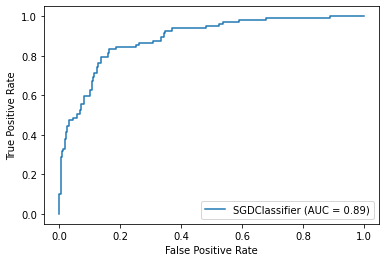

In [24]:
y_hat = clf_sgd3.predict(X_validation_bestfeature)
plot_roc_curve(clf_sgd3, X_validation_bestfeature, Y_validation)

```[Q7] Report the model setting, training time, and performance of the neural networks for each value of H. You are also expected to repeat each setting three times for the same hyperparameter setting and report the mean and standard deviation of the training time, accuracy, and F1 score for each setting.```

```
Number of hidden layers: 1
Accuracy:  
Mean:  0.5637860082304527 Standard Deviation:  0.18699957069050313
Total Time:  
Mean:  0.028590281804402668 Standard Deviation:  0.005235625182907372
F1 Score:  
Mean:  0.1536025336500396 Standard Deviation:  0.21722678630275566 


Number of hidden layers: 2
Accuracy:  
Mean:  0.43004115226337447 Standard Deviation:  0.18477893253228708
Total Time:  
Mean:  0.08111151059468587 Standard Deviation:  0.0780371966718157
F1 Score:  
Mean:  0.348140739814699 Standard Deviation:  0.15933500304771672 


Number of hidden layers: 4
Accuracy:  
Mean:  0.7407407407407408 Standard Deviation:  0.037122671919071405
Total Time:  
Mean:  0.07712904612223308 Standard Deviation:  0.03974276221602449
F1 Score:  
Mean:  0.400935550935551 Standard Deviation:  0.28948125035785965 


Number of hidden layers: 8
Accuracy:  
Mean:  0.8065843621399177 Standard Deviation:  0.025863796481433214
Total Time:  
Mean:  0.0920867125193278 Standard Deviation:  0.04058240596620695
F1 Score:  
Mean:  0.699462272831838 Standard Deviation:  0.022038216146095805 


Number of hidden layers: 16
Accuracy:  
Mean:  0.8220164609053499 Standard Deviation:  0.019081519538056983
Total Time:  
Mean:  0.0990585486094157 Standard Deviation:  0.031475464149704604
F1 Score:  
Mean:  0.719755671116514 Standard Deviation:  0.02554833021939203 


Number of hidden layers: 32
Accuracy:  
Mean:  0.8456790123456791 Standard Deviation:  0.0075601535271085625
Total Time:  
Mean:  0.10837690035502116 Standard Deviation:  0.020622350268244924
F1 Score:  
Mean:  0.7432363973933378 Standard Deviation:  0.010437802720236618 


Number of hidden layers: 64
Accuracy:  
Mean:  0.8446502057613169 Standard Deviation:  0.011909297225092843
Total Time:  
Mean:  0.11469316482543945 Standard Deviation:  0.011015765534411324
F1 Score:  
Mean:  0.7371880328572495 Standard Deviation:  0.022382919936773604 


Number of hidden layers: 128
Accuracy:  
Mean:  0.8364197530864198 Standard Deviation:  0.014031051128586285
Total Time:  
Mean:  0.15392136573791504 Standard Deviation:  0.03400851557795805
F1 Score:  
Mean:  0.7254197603404376 Standard Deviation:  0.023204553945857555 
```

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
def mlp_stats (tot, acc, f1_sc):
    tot = np.array(tot)
    acc = np.array(acc)
    f1_sc = np.array(f1_sc)
    print("Accuracy: ", "\nMean: ", acc.mean(), "Standard Deviation: ", acc.std())
    print("Total Time: ", "\nMean: ", tot.mean(), "Standard Deviation: ", tot.std())
    print("F1 Score: ", "\nMean: ", f1_sc.mean(), "Standard Deviation: ", f1_sc.std(), "\n\n")
    mean_accur.append(acc.mean())
    mean_f1.append(f1_sc.mean())
    error_accuracy.append((acc.max()-acc.min())/2)
    error_f1.append((f1_sc.max()-f1_sc.min())/2)

In [27]:
#hidden_unit = 1
error_accuracy = []
error_f1 = []
mean_accur = []
mean_f1 = []
def mlp_classifier_function (hid_layers):
    print(f'Number of hidden layers: {hid_layers}')
    runti = []
    accur = []
    f1 = []
    for i in range (3):
        start = time.time()
        clf_mlp = MLPClassifier(hidden_layer_sizes=(hid_layers, ), max_iter=500, early_stopping = True)
        clf_mlp.fit(X_train_bestfeature, Y_train)
        end = time.time()
        
        #stats
        y_hat = clf_mlp.predict(X_validation_bestfeature)
        runti.append (end - start)
        accur.append (accuracy_score(Y_validation, y_hat))
        f1.append (f1_score(Y_validation, y_hat))
    mlp_stats (runti, accur, f1)

In [28]:
i = 0
while (i < 8):
    mlp_classifier_function (2**i)
    i += 1

Number of hidden layers: 1
Accuracy:  
Mean:  0.5637860082304527 Standard Deviation:  0.18699957069050313
Total Time:  
Mean:  0.028590281804402668 Standard Deviation:  0.005235625182907372
F1 Score:  
Mean:  0.1536025336500396 Standard Deviation:  0.21722678630275566 


Number of hidden layers: 2
Accuracy:  
Mean:  0.43004115226337447 Standard Deviation:  0.18477893253228708
Total Time:  
Mean:  0.08111151059468587 Standard Deviation:  0.0780371966718157
F1 Score:  
Mean:  0.348140739814699 Standard Deviation:  0.15933500304771672 


Number of hidden layers: 4
Accuracy:  
Mean:  0.7407407407407408 Standard Deviation:  0.037122671919071405
Total Time:  
Mean:  0.07712904612223308 Standard Deviation:  0.03974276221602449
F1 Score:  
Mean:  0.400935550935551 Standard Deviation:  0.28948125035785965 


Number of hidden layers: 8
Accuracy:  
Mean:  0.8065843621399177 Standard Deviation:  0.025863796481433214
Total Time:  
Mean:  0.0920867125193278 Standard Deviation:  0.04058240596620695
F

```[Q8] Compare the training time, accuracy and F1 score of the logistic regression model and the best neural network model.```

```
Best Logistic Model
    Accuracy:  
        Mean:  0.8405349794238682 Standart Deviation:  0.0029099044493273167
    Total Time:  
        Mean:  0.0036570231119791665 Standart Deviation:  0.00047047122097760647
    F1 Score:  
        Mean:  0.7454354643539083 Standart Deviation:  0.006523927056779405

Best Single Layered Neural Network
Number of hidden layers: 64
    Accuracy:  
            Mean:  0.8446502057613169 Standard Deviation:  0.011909297225092843
    Total Time:  
            Mean:  0.11469316482543945 Standard Deviation:  0.011015765534411324
    F1 Score:  
            Mean:  0.7371880328572495 Standard Deviation:  0.022382919936773604 

Both are quite similar in terms of accuracy and f1 score, however, the runtime of the logistic model is comparatively lower. This has to do with the number of hidden layers in the neural network model. The more the layers, the higher the number of computations our program has to do. On the other hand, this logistical model used in this program does not have any neural network. Therefore, the number of computations in logistic based model are less compared to neural where it has multiple layers with logistical computations.
```

``` [Q9] Plot the accuracy and the F1 score for different values of H. Suggest a possible reason for the gap between the accuracy and the F1 score.```

```
The graph below has a gap between its accuracy and F1 score. People often confuse them with each other. Both of them are good metrics to measure how good or bad our program performs as opposed to the real world scenarios. However, they are both different. 

Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes.

In our scenario, based on our program, it detects that there is less imbalance between the classes as opposed to the scatterings in the class distribution. 

Also, the values of accuracy and F1_score increases as the hidden layers increase. It is purely because of the more hidden layers do more amount of computation, leading to higher accuracy and f1 score. However, it should also be noticed that after a certain amount of layers, both accuracy and f1 score reach a plateau because more computation done in a single layer does not affect the predictability. At that time, it is a waste of time and resources to add more hidden layers.
```

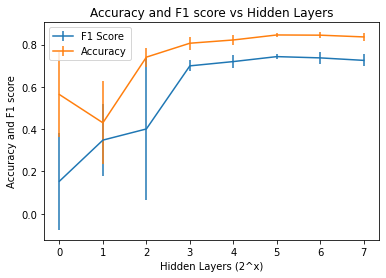

In [29]:
x = np.arange(0,8)

plt.errorbar(x, mean_f1, yerr = error_f1)
plt.errorbar(x, mean_accur, yerr = error_accuracy)
plt.title("Accuracy and F1 score vs Hidden Layers")
plt.ylabel("Accuracy and F1 score")
plt.xlabel("Hidden Layers (2^x)")
labels = ["F1 Score", "Accuracy"]
plt.legend(labels)
plt.show()


```[Q10] Do you notice any trend when you increase the hidden layer size from 1 to 128? If so, please describe what the trend is and suggest a reason for your observation.```

```
The values of accuracy and F1_score increases as the hidden layers increase. It is purely because of the more hidden layers do more amount of computation, leading to higher accuracy and f1 score. 

Furthermore, it should also be noticed that after a certain number of layers, both accuracy and f1 score reach a plateau because more computation done in a single layer does not affect the predictability and probability. At that time, it is a waste of time and resources to add more hidden layers.

Also, it is to be kept in mind that a single hidden layer or when hidden layer in a network is only 1 or 2, the accuracy and f1 score are totally arbitrary and should not be trusted because the network has not had enough experience with the predictions and cannot compute accurately. 

In general, the trend of accuracy and f1 score is increasing until it reaches plateau or reaches its peak.
```

```[Q11] Report 10 combinations of the hyperparameter setting.```

```
Model with rank: 1
Mean validation score: 0.846 (std: 0.032)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.0012318971316554704, 'solver': 'adam'}

Model with rank: 2
Mean validation score: 0.846 (std: 0.031)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.003362087797543175, 'solver': 'adam'}

Model with rank: 3
Mean validation score: 0.845 (std: 0.021)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.584322822880992, 'solver': 'sgd'}

Model with rank: 4
Mean validation score: 0.844 (std: 0.040)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate': 'constant', 'learning_rate_init': 0.028825474602309397, 'solver': 'adam'}

Model with rank: 5
Mean validation score: 0.844 (std: 0.031)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.21443795605263427, 'solver': 'sgd'}

Model with rank: 6
Mean validation score: 0.844 (std: 0.032)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.21210843176425248, 'solver': 'sgd'}

Model with rank: 7
Mean validation score: 0.844 (std: 0.028)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate': 'constant', 'learning_rate_init': 0.34255810844330625, 'solver': 'sgd'}

Model with rank: 8
Mean validation score: 0.843 (std: 0.033)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (128,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.005796982941839667, 'solver': 'adam'}

Model with rank: 9
Mean validation score: 0.842 (std: 0.030)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (128,), 'learning_rate': 'constant', 'learning_rate_init': 0.04778732263345931, 'solver': 'adam'}

Model with rank: 10
Mean validation score: 0.841 (std: 0.038)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (128,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.027912042472638933, 'solver': 'adam'}
```

In [30]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

In [31]:
param_settings = {
    'hidden_layer_sizes': [(64, ), (128, )], # hidden layers, output layers
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': loguniform(1e-3, 1e0),
    'activation': ['relu'], # relu hyperbolic tangent
    'solver': ['adam', 'sgd']
}

mlp = MLPClassifier(random_state = 4211, early_stopping = True, verbose = False) #multi layer perceptron classifier

random_search = RandomizedSearchCV(mlp, param_settings, n_iter=20, cv=5, verbose=0)

X_all = traindf[all_features]
Y_all = traindf["label"]

#train with the entire training set

#selecting best 8 features
X_all = traindf[all_features]
X_all_bestfeature = selector.transform(X_all)
#standard processing
X_all_bestfeature = scaler.transform(X_all_bestfeature)
Y_all = traindf["label"]
random_search.fit(X_all_bestfeature, Y_all)

RandomizedSearchCV(cv=5,
                   estimator=MLPClassifier(early_stopping=True,
                                           random_state=4211),
                   n_iter=20,
                   param_distributions={'activation': ['relu'],
                                        'hidden_layer_sizes': [(64,), (128,)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'learning_rate_init': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020301853310>,
                                        'solver': ['adam', 'sgd']})

In [32]:
# Utility function to report best scores
def report(results, n_top=10):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [33]:
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.846 (std: 0.032)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.0012318971316554704, 'solver': 'adam'}

Model with rank: 2
Mean validation score: 0.846 (std: 0.031)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.003362087797543175, 'solver': 'adam'}

Model with rank: 3
Mean validation score: 0.845 (std: 0.021)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.584322822880992, 'solver': 'sgd'}

Model with rank: 4
Mean validation score: 0.844 (std: 0.040)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate': 'constant', 'learning_rate_init': 0.028825474602309397, 'solver': 'adam'}

Model with rank: 5
Mean validation score: 0.844 (std: 0.031)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learn

In [34]:
random_search.score(X_validation_bestfeature, Y_validation)

0.845679012345679

```[Q12] Report the three best hyperparameter settings in terms of accuracy as well as the mean and standard deviation of the validation accuracy of the five random data splits for each hyperparameter setting.```

```
The three best hyperparameter settings in terms of accuracy as well as the mean and standard deviation of the validation accuracy of the five random data splits for each hyperparameter setting are:

1. activation: ReLu
2. solver: Adam 
3. learning_rate: Constant

Additionaly, hidden_layer_sizes also plays a big role as aforementioned. All the below chronologically ranked models have a mojority of this configuaration which leads me to believe that these are the most important hyperparameters.

Model with rank: 1
Mean validation score: 0.850 (std: 0.031)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (128,), 'learning_rate': 'constant', 'learning_rate_init': 0.0010326611294029274, 'solver': 'adam'}

Model with rank: 2
Mean validation score: 0.846 (std: 0.037)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (128,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.0020456622003242036, 'solver': 'adam'}

Model with rank: 3
Mean validation score: 0.845 (std: 0.028)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate': 'constant', 'learning_rate_init': 0.05572306390510445, 'solver': 'adam'}

```

In [35]:
report(random_search.cv_results_, 3)

Model with rank: 1
Mean validation score: 0.846 (std: 0.032)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.0012318971316554704, 'solver': 'adam'}

Model with rank: 2
Mean validation score: 0.846 (std: 0.031)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.003362087797543175, 'solver': 'adam'}

Model with rank: 3
Mean validation score: 0.845 (std: 0.021)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.584322822880992, 'solver': 'sgd'}



```[Q13] Use the best model in terms of accuracy to predict the instances in the test set (test.csv). Report the accuracy, F1 score and the confusion matrix of the predictions on the test set.```

```
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       260
         1.0       0.83      0.72      0.77       140

    accuracy                           0.85       400
   macro avg       0.85      0.82      0.83       400
weighted avg       0.85      0.85      0.85       400

F1 Score:  0.7739463601532567
Accuracy:  0.8525
```

In [36]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [37]:
pred = random_search.predict(X_test_bestfeature)
print(classification_report(Y_test, pred))
print("F1 Score: ", f1_score(Y_test, pred), )
print("Accuracy: ", accuracy_score(Y_test, pred))

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       260
         1.0       0.83      0.72      0.77       140

    accuracy                           0.85       400
   macro avg       0.85      0.82      0.83       400
weighted avg       0.85      0.85      0.85       400

F1 Score:  0.7739463601532567
Accuracy:  0.8525


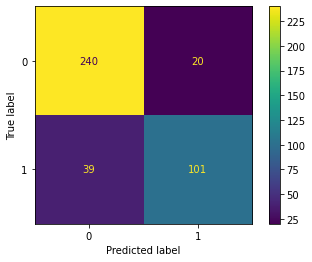

In [38]:
plot_confusion_matrix(random_search, X_test_bestfeature, Y_test)

```[Q14] Name another two methods to deal with the imbalanced dataset problem.```

```
Two methods that deal with imbalanced dataset problem are:

    1. Resampling the training set. Under sampling or Oversampling is widely used in such cases. Under sampling for the samples that are in excess and oversampling for the samples of the classes that are in deficit.
    2. Cluster the abundant classes. Instead of relying on random samples to cover the variety of the training samples, clustering the abundant class in r groups, with r being the number of cases in r is suggested. For each group, only the medoid (Centre of cluster) is kept. The model is then trained with the rare class and the medoids only.
    
    Apart from these two, there are myriads of other things that can be done example, resampling with different ratios, ensemble different resampled datasets and using the right evaluation metrics.
```

```[Q15] Use the best model in terms of accuracy to predict the instances in the test set (test.csv). Report the accuracy, F1 score and the confusion matrix of the predictions on the test set.```

```
Predictions on test set:
                precision    recall  f1-score   support

             0.0       0.93      0.87      0.89       260
             1.0       0.78      0.87      0.82       140

        accuracy                           0.87       400
       macro avg       0.85      0.87      0.86       400
    weighted avg       0.87      0.87      0.87       400

    f1 score:  0.8215488215488216
    Accuracy:  0.8675
```

train.csv label set: 
0    1068
1     549
Name: label, dtype: int64


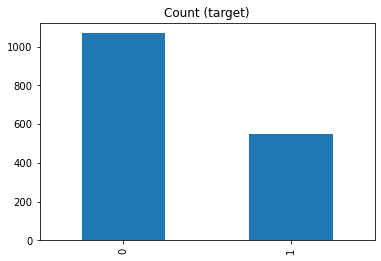

In [39]:
print("train.csv label set: ")
traindf.label.value_counts().plot(kind='bar', title='Count (target)')
print(traindf.label.value_counts())

In [40]:
# Class count
# copying traindf
df_train = traindf.copy()
count_class_0, count_class_1 = df_train.label.value_counts()

# Divide by class
df_class_0 = df_train[df_train['label'] == 0]
df_class_1 = df_train[df_train['label'] == 1]

Random over-sampling

Random over-sampling:
1    1068
0    1068
Name: label, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

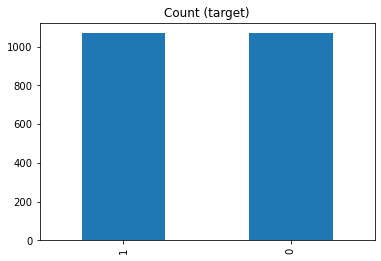

In [41]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
# oversampled dataset
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.label.value_counts())

df_test_over.label.value_counts().plot(kind='bar', title='Count (target)')

In [42]:
X_all_1 = df_test_over[all_features]
Y_all_1 = df_test_over["label"]

#selecting best 8 features
X_all_bestfeature_1 = selector.transform(X_all_1)
#standard processing
X_all_bestfeature_1 = scaler.transform(X_all_bestfeature_1)

random_search_1 = RandomizedSearchCV(mlp, param_settings, n_iter=20, cv=5, verbose=0)

random_search_1.fit(X_all_bestfeature_1, Y_all_1)


RandomizedSearchCV(cv=5,
                   estimator=MLPClassifier(early_stopping=True,
                                           random_state=4211),
                   n_iter=20,
                   param_distributions={'activation': ['relu'],
                                        'hidden_layer_sizes': [(64,), (128,)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'learning_rate_init': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020301853310>,
                                        'solver': ['adam', 'sgd']})

In [43]:
report(random_search_1.cv_results_, 1)

Model with rank: 1
Mean validation score: 0.861 (std: 0.040)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (128,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.012449173273590557, 'solver': 'adam'}



In [44]:
pred = random_search_1.predict(X_test_bestfeature)
print(classification_report(Y_test, pred))
print("f1 score: ", f1_score(Y_test, pred))
print("Accuracy: ", accuracy_score(Y_test, pred))

              precision    recall  f1-score   support

         0.0       0.93      0.87      0.89       260
         1.0       0.78      0.87      0.82       140

    accuracy                           0.87       400
   macro avg       0.85      0.87      0.86       400
weighted avg       0.87      0.87      0.87       400

f1 score:  0.8215488215488216
Accuracy:  0.8675


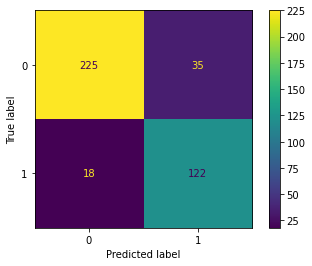

In [45]:
plot_confusion_matrix(random_search_1, X_test_bestfeature, Y_test)

``` [Q16] Compare the accuracy, F1 score and the confusion matrix with those in Section 7.1.```

```
There seems to be very minor change in the accuracy and f1 score. If anything, I had predicted for the accuracy to lower down because of the duplicate elements in the data resulting to overfitting. However, the tradeoff between imbalanced dataset and overfitting seems to be about the same in this case. Although if there is one thing that should be noticed is that the number of errors occuring in section 7.1 were mostly when class/label was equal to 1 which could have very well been due to the unbalanced data. On the contrary, the number of errors occuring after oversampling is about the same in both the classes.

Overall, the total number of errors made by our program are about the same in both the cases leading to a similar accuracy and f1 score.
```